## Reto Restaurantes Colombianos


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

tf.__version__

'2.4.1'

### Los datos

[kaggle: twitter-airline-sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv)

In [7]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

#ruta = 'gdrive/My Drive/Colab Notebooks/Sentimientos'


Mounted at /content/gdrive


In [2]:
#df= pd.read_csv(ruta + '/restaurant_reviews_clean.csv')
df= pd.read_csv('restaurant_reviews_clean.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Nombre,Título,Fecha,Rating,Reviews,Tipo,reviews_limpios
0,0,0,Casa Vieja Restaurante,Comida Tiquita en un ambiente muy colombiano,15 de octubre de 2019,50,Tuve la experiencia de ir almozar a este típic...,"Colombiana, Sudamericana",experiencia almozar típico restaurante colombi...
1,1,1,Casa Vieja Restaurante,Me gustó!!,22 de octubre de 2018,40,"El restaurante es agradable, antiguo y familia...","Colombiana, Sudamericana",restaurante agradable antiguo familiar persona...
2,2,2,Casa Vieja Restaurante,Restaurante tradicional frente al Hotel Tequen...,18 de septiembre de 2018,40,"Llegamos tarde como a las 17 horas, ya no habí...","Colombiana, Sudamericana",llegamos tarde horas público atendieron bien c...
3,3,3,Casa Vieja Restaurante,QUE GRATO VOLVER,4 de agosto de 2016,50,Hace años no disfrutaba de un almuerzo en este...,"Colombiana, Sudamericana",hace años disfrutaba almuerzo agradable restau...
4,4,4,Casa Vieja Restaurante,Un clásico que no defrauda,1 de agosto de 2016,40,Lugar típico de cocina colombiana que uno no p...,"Colombiana, Sudamericana",lugar típico cocina colombiana puede dejar vis...


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [4]:
df.head()

,Nombre,Título,Fecha,Rating,Reviews,Tipo,reviews_limpios
0,Casa Vieja Restaurante,Comida Tiquita en un ambiente muy colombiano,15 de octubre de 2019,50,Tuve la experiencia de ir almozar a este típic...,"Colombiana, Sudamericana",experiencia almozar típico restaurante colombi...
1,Casa Vieja Restaurante,Me gustó!!,22 de octubre de 2018,40,"El restaurante es agradable, antiguo y familia...","Colombiana, Sudamericana",restaurante agradable antiguo familiar persona...
2,Casa Vieja Restaurante,Restaurante tradicional frente al Hotel Tequen...,18 de septiembre de 2018,40,"Llegamos tarde como a las 17 horas, ya no habí...","Colombiana, Sudamericana",llegamos tarde horas público atendieron bien c...
3,Casa Vieja Restaurante,QUE GRATO VOLVER,4 de agosto de 2016,50,Hace años no disfrutaba de un almuerzo en este...,"Colombiana, Sudamericana",hace años disfrutaba almuerzo agradable restau...
4,Casa Vieja Restaurante,Un clásico que no defrauda,1 de agosto de 2016,40,Lugar típico de cocina colombiana que uno no p...,"Colombiana, Sudamericana",lugar típico cocina colombiana puede dejar vis...


In [16]:
#!pip install google_trans_new
#from googletrans import Translator
#from google_trans_new import google_translator  

In [17]:
#translator = google_translator() 
#df['reviews_limpios'] = df['reviews_limpios'].astype(str)
#df1 = df['reviews_limpios'][:1000]
#df_reviews['reviews_traducidas'] = df1.apply(translator.translate,  dest='en').apply(getattr, args=('text',))


In [67]:
#for j in range(len(df['reviews_limpios'][:20])):
 #   df['reviews_traducidas'][j] = translator.translate(df['reviews_limpios'][j], lang_src='es', lang_tgt='en')

In [5]:
def polarity_to_label(x):
    if(x <= 20):
        return 'negative'
    if(x == 30):
        return 'neutral'
    if(x >= 40):
        return 'positive'
df['etiquetas'] = df.Rating.apply(polarity_to_label)

### Análisis descriptivos

In [6]:
df = df[df['etiquetas'] != 'neutral']
df.head(10)
# convert airline_seentiment to numeric


,Nombre,Título,Fecha,Rating,Reviews,Tipo,reviews_limpios,etiquetas
0,Casa Vieja Restaurante,Comida Tiquita en un ambiente muy colombiano,15 de octubre de 2019,50,Tuve la experiencia de ir almozar a este típic...,"Colombiana, Sudamericana",experiencia almozar típico restaurante colombi...,positive
1,Casa Vieja Restaurante,Me gustó!!,22 de octubre de 2018,40,"El restaurante es agradable, antiguo y familia...","Colombiana, Sudamericana",restaurante agradable antiguo familiar persona...,positive
2,Casa Vieja Restaurante,Restaurante tradicional frente al Hotel Tequen...,18 de septiembre de 2018,40,"Llegamos tarde como a las 17 horas, ya no habí...","Colombiana, Sudamericana",llegamos tarde horas público atendieron bien c...,positive
3,Casa Vieja Restaurante,QUE GRATO VOLVER,4 de agosto de 2016,50,Hace años no disfrutaba de un almuerzo en este...,"Colombiana, Sudamericana",hace años disfrutaba almuerzo agradable restau...,positive
4,Casa Vieja Restaurante,Un clásico que no defrauda,1 de agosto de 2016,40,Lugar típico de cocina colombiana que uno no p...,"Colombiana, Sudamericana",lugar típico cocina colombiana puede dejar vis...,positive
5,Casa Vieja Restaurante,Luego de 40 años mejor aún!,12 de marzo de 2016,50,"Luego de visitarlo hace 40 años, me consigo un...","Colombiana, Sudamericana",luego visitarlo hace años consigo restaurante ...,positive
6,Casa Vieja Restaurante,Comida típica Colombiana,25 de febrero de 2016,40,"El entorno es muy agradable, desde la decoraci...","Colombiana, Sudamericana",entorno agradable decoración música servicio p...,positive
7,Casa Vieja Restaurante,Recomendable 100% en Bogotá.,16 de septiembre de 2015,50,Exquisita calidad en los platos típicos colomb...,"Colombiana, Sudamericana",exquisita calidad platos típicos colombianos z...,positive
8,Casa Vieja Restaurante,Muy buen Puchero y platos tipicos!!!,11 de septiembre de 2015,40,Regrese después de muchos años y de malas expe...,"Colombiana, Sudamericana",regrese después años malas experiencias ahora ...,positive
9,Casa Vieja Restaurante,Critica de un mexicano,19 de agosto de 2015,40,Estuve con unos amigos y esposa disfrutando es...,"Colombiana, Sudamericana",amigos esposa disfrutando lugar coincido denom...,positive


In [7]:
df.shape

(40206, 8)

In [8]:
sentiment_label = df.etiquetas.factorize() # convierte a factores numéricos
print(sentiment_label)

(array([0, 0, 0, ..., 0, 0, 0]), Index(['positive', 'negative'], dtype='object'))


## Modelo Predictivo: polaridad

### Preprocesamiento de textos

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:

df['reviews_limpios'] = df['reviews_limpios'].astype(str)


In [11]:
review = df.reviews_limpios.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [12]:
print(review.shape)

(40206,)


In [13]:
print(review[1])
print(encoded_docs[1])

restaurante agradable antiguo familiar personal agradó bastante servicio bueno comida típica colombiana bien lograda clásico tour gastronómico bogotá recomendado
[9, 12, 1802, 230, 47, 4107, 57, 5, 18, 1, 248, 153, 11, 2350, 616, 2482, 1663, 21, 16]


In [14]:
print(padded_sequence[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    9
   12 1802  230   47 4107   57    5   18    1  248  153   11 2350  616
 2482 

### El Modelo keras

In [15]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 8
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(6, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 8)            221576    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 8)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 6)                 360       
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 221,943
Trainable params: 221,943
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='../Imagenes/model.png')

In [16]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
1006/1006 [==============================] - 109s 106ms/step - loss: 0.3675 - accuracy: 0.8899 - val_loss: 0.0919 - val_accuracy: 0.9697
Epoch 2/10
1006/1006 [==============================] - 103s 102ms/step - loss: 0.1337 - accuracy: 0.9584 - val_loss: 0.0791 - val_accuracy: 0.9728
Epoch 3/10
1006/1006 [==============================] - 103s 102ms/step - loss: 0.1089 - accuracy: 0.9645 - val_loss: 0.0828 - val_accuracy: 0.9739
Epoch 4/10
1006/1006 [==============================] - 102s 102ms/step - loss: 0.0916 - accuracy: 0.9695 - val_loss: 0.0833 - val_accuracy: 0.9743
Epoch 5/10
1006/1006 [==============================] - 102s 101ms/step - loss: 0.0838 - accuracy: 0.9724 - val_loss: 0.0818 - val_accuracy: 0.9736
Epoch 6/10
1006/1006 [==============================] - 102s 102ms/step - loss: 0.0789 - accuracy: 0.9741 - val_loss: 0.0836 - val_accuracy: 0.9719
Epoch 7/10
1006/1006 [==============================] - 104s 103ms/step - loss: 0.0751 - accuracy: 0.9756 - val_

In [20]:
model.save('modelo4.h5')

In [35]:
type(history)

tensorflow.python.keras.callbacks.History

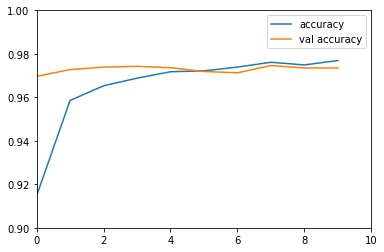

In [17]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.ylim([0.9,1.0])
plt.xlim([0,10])
plt.legend()
plt.show()

In [26]:
history.history

{'loss': [0.19431373476982117,
  0.09885523468255997,
  0.08434370160102844,
  0.07419566810131073,
  0.07000431418418884,
  0.06249026581645012,
  0.05944979563355446,
  0.058214038610458374,
  0.05437040328979492,
  0.05457182228565216],
 'accuracy': [0.9337769150733948,
  0.9659557342529297,
  0.9704638719558716,
  0.9753140211105347,
  0.976433277130127,
  0.9782365560531616,
  0.9798221588134766,
  0.9795112609863281,
  0.9823715686798096,
  0.9816254377365112],
 'val_loss': [0.08098403364419937,
  0.07575049996376038,
  0.07948372513055801,
  0.08077573776245117,
  0.08118444681167603,
  0.08761933445930481,
  0.09052020311355591,
  0.09381916373968124,
  0.09610302001237869,
  0.09811465442180634],
 'val_accuracy': [0.9716488718986511,
  0.974260151386261,
  0.9740114212036133,
  0.9743844866752625,
  0.9748818874359131,
  0.9726436138153076,
  0.971275806427002,
  0.968913197517395,
  0.9701566696166992,
  0.9717732071876526]}

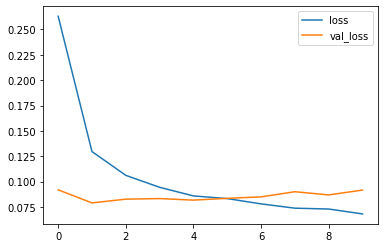

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [28]:
test_rev = []
test_rev.append(df['reviews_limpios'][20])
tw = tokenizer.texts_to_sequences(test_rev)
tw = pad_sequences(tw,maxlen=200)
tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [117]:
prediction = model.predict(tw)
prediction

array([[0.00768345]], dtype=float32)

In [31]:
test_rev

['bonito sitio familia buen servicio recomendado celebraciones familiares']

In [32]:
a

['Malo']

In [42]:
a=['Ese restaurante no me gusto, pesimo servicio','algo muy lindo y especial']
tw = tokenizer.texts_to_sequences(a)
tw = pad_sequences(tw,maxlen=200)
tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [43]:
model.predict(tw)

array([[0.97404075],
       [0.06273761]], dtype=float32)